# María Sofía Álvarez López

## Generación de números aleatorios, método GLC

Un generador lineal congruencial (GLC) es un algoritmo que permite obtener una secuencia de números pseudoaleatorios calculados con una función lineal definida a trozos discontinua

$$r = (ar_0+c)\,\text{mod}\,M$$

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

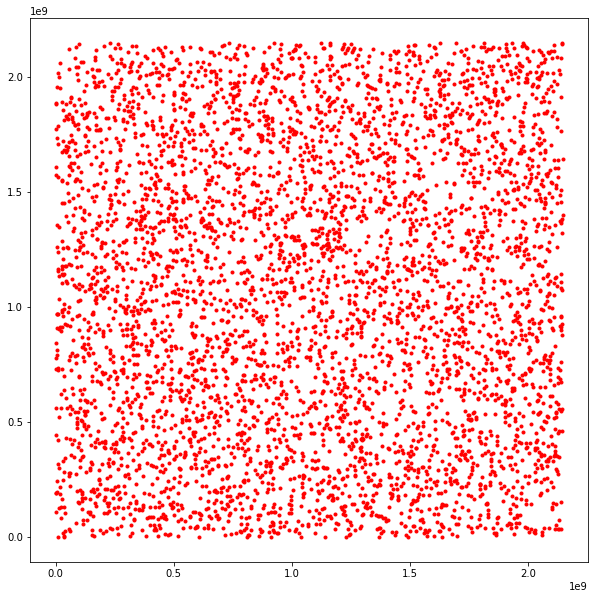

In [2]:
def seudoAleatorio(a, r0, c, M):
    return (a*r0 + c)%M

def listaAleatoria(a, r0, c, M, L):
    rands = []
    for i in range(L):
        r = seudoAleatorio(a, r0, c, M)
        rands.append(r)
        r0 = r
    return rands

#seudoAleatorio(3, 4, 1, 9)
lista = listaAleatoria(8121,5,28411,2**31,10000)

x = lista[0::2]
y = lista[1::2]

plt.figure(figsize=(10,10))
plt.plot(x,y,'ro', markersize=3)
plt.show()

## Estimación del valor de $\pi$ madiante el método de Montecarlo

El área de un cuadrado de lado $2r$ es:
$$A_{\text{cuadrado}} = (2r)(2r)= 4r^2\,\,\,\,\rightarrow \,\,\,\,r^2 = \frac{A_{\text{cuadrado}}}{4}$$

El área de un círculo es

$$ A_{\text{círculo}} = \pi r^2\,\,\,\,\rightarrow\,\,\,\,\pi = \frac{A_{\text{círculo}}}{r^2} = \frac{4A_{\text{círculo}}}{A_{\text{cuadrado}}}$$

al realizar lanzamientos de, supongamos granos, sobre el cuadrado con una probabilidad idéntica para cada punto sobre el cuadrado, podemos aproximar el valor de $\pi$ como:

$$\pi \approx \frac{4\times({\text{# de granos dentro del círculo}})}{\text{# de granos dentro del cuadrado}}$$


3.14368

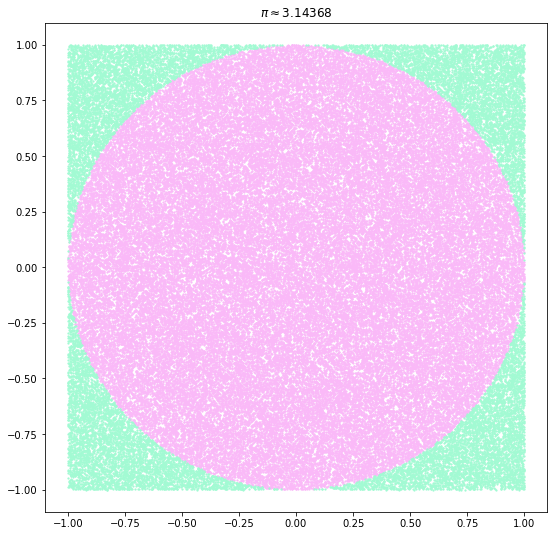

In [3]:
#np.random.seed(24)
granos = 100000

def pi_montecarlo(granos, draw=False):
    x, y = np.random.rand(2, granos)*2 - 1
    C = x**2 + y**2 <= 1**2
    pi = 4* sum(C) / granos
    if draw: dibujar_granos(pi, x, y, C)
    return pi

def dibujar_granos(pi, x, y, C):
    plt.figure(figsize=(9,9))
    plt.plot(x[C], y[C], 'o', color='#fab9f8', markersize=1.2)
    plt.title(r"$\pi \approx $" + str(pi))
    plt.plot(x[~C], y[~C], 'o', color='#a2fad3', markersize=1.2)

pi_montecarlo(granos, True)

En rosado, tenemos los puntos adentro del circulo, en aguamarina, los del cuadrado.

## Simulación de lanzamiento de dados

350.1015
El valor más frecuente es:  350.1015


(350.1015, 17.054275057885047)

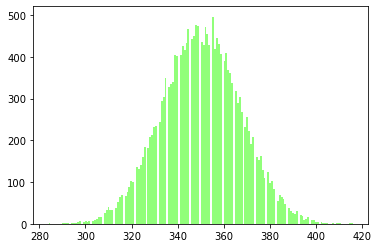

In [4]:
num_dados = 100
repeticiones = 20000

def simular_lanzamientos(repeticiones, num_dados):
    resultados = np.random.randint(6, size=(num_dados, repeticiones))+1
    return np.sum(resultados, axis=0)

def ajuste_gaussiano_normalizado(valores):
    mu, std = norm.fit(valores)
    print('El valor más frecuente es: ', mu)
    return mu, std

sumas = simular_lanzamientos(repeticiones, num_dados)
plt.hist(sumas, bins=160, color='#91ff7a')
print(np.mean(sumas))
ajuste_gaussiano_normalizado(sumas)

## Integración de Montecarlo en una dimensión

$$\int^b_a\! f(x)dx = \lim_{n\to\infty}\frac{b-a}{n}\sum^n_{i=1}\! f(u_i(b-a)+a)$$

$$\int^b_a\! f(x)dx \simeq \frac{b-a}{n}\sum^n_{i=1}\! f(u_i(b-a)+a)$$

Donde cada $u_i$ es un número aleatorio distinto en el intervalo $[0, 1]$



In [5]:
a = 0
b = 10
n = 1100000

def f(x):
    return x**2

def integracion_de_montecarlo(f,a,b,n):
    u = np.random.rand(n)
    return np.sum(f(u * (b - a) + a))*(b - a)/n

integracion_de_montecarlo(f, a, b, n)

333.4837837480467

## Integración de Montecarlo en N dimensiones

$$\int^{b_1}_{a_1}\cdots\int^{b_2}_{a_2}\! f(x_1,\dots,x_n)dx_1\dots dx_n \simeq \frac{(b_1-a_1)\dots (b_n-a_n)}{N_1\dots N_n}\sum^{N_1}_{i_1=1}\cdots \sum^{N_n}_{i_n=1}\! f(w_1,\dots,w_j,\dots,w_n)$$

Donde $w_j = u_j(b_j-a_j) + a_j$